In [1]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

In [2]:
%time
inf_model = YOLO('/models/best.pt')  # load a custom model
results = inf_model('test/',save= True,augment = True)  # predict on an image

CPU times: total: 0 ns
Wall time: 0 ns

image 1/40 D:\0-Rojects\2023-Atomhack\test\0_607.bmp: 128x160 (no detections), 58.0ms
image 2/40 D:\0-Rojects\2023-Atomhack\test\0_651.bmp: 128x160 (no detections), 12.0ms
image 3/40 D:\0-Rojects\2023-Atomhack\test\1_139.bmp: 128x160 (no detections), 10.0ms
image 4/40 D:\0-Rojects\2023-Atomhack\test\1_189.bmp: 128x160 (no detections), 13.0ms
image 5/40 D:\0-Rojects\2023-Atomhack\test\1_207.bmp: 128x160 (no detections), 11.0ms
image 6/40 D:\0-Rojects\2023-Atomhack\test\1_303.bmp: 128x160 (no detections), 12.0ms
image 7/40 D:\0-Rojects\2023-Atomhack\test\1_429.bmp: 128x160 (no detections), 10.0ms
image 8/40 D:\0-Rojects\2023-Atomhack\test\1_564.bmp: 128x160 (no detections), 11.0ms
image 9/40 D:\0-Rojects\2023-Atomhack\test\1_641.bmp: 128x160 (no detections), 11.0ms
image 10/40 D:\0-Rojects\2023-Atomhack\test\1_686.bmp: 128x160 (no detections), 12.0ms
image 11/40 D:\0-Rojects\2023-Atomhack\test\1_769.bmp: 128x160 (no detections), 11.0ms
image 12/40 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'не дефект', 1: 'потертость', 2: 'черная точка', 3: 'плена', 4: 'маркер', 5: 'грязь', 6: 'накол', 7: 'н.д. накол', 8: 'микровыступ', 9: 'н.д. микровыступ', 10: 'вмятина', 11: 'мех.повреждение', 12: 'риска', 13: 'царапина с волчком'}
 orig_img: array([[[205, 205, 205],
         [202, 202, 202],
         [204, 204, 204],
         ...,
         [196, 196, 196],
         [196, 196, 196],
         [196, 196, 196]],
 
        [[200, 200, 200],
         [197, 197, 197],
         [200, 200, 200],
         ...,
         [200, 200, 200],
         [196, 196, 196],
         [202, 202, 202]],
 
        [[196, 196, 196],
         [195, 195, 195],
         [199, 199, 199],
         ...,
         [194, 194, 194],
         [200, 200, 200],
         [200, 200, 200]],
 
        ...,
 
        [[144, 144, 144],
         [142, 142, 142],
         [143, 143,

In [5]:
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image


In [6]:
yolov8_model_path = "runs/detect/train13/weights/best.pt"
download_yolov8s_model(yolov8_model_path)


In [7]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device='cuda:0'
)

In [10]:
from sahi.slicing import slice_image

slice_image_result = slice_image(
    image="./test/2_118.bmp",
    output_file_name='output_file_name.jpg',
    output_dir="./sliced",
    slice_height=300,
    slice_width=300,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

In [13]:
result = get_sliced_prediction(
        "./test/2_118.bmp",
    detection_model,
    slice_height =300,
    slice_width = 300,
    overlap_height_ratio = 0.3,
    overlap_width_ratio = 0.3
)

Performing prediction on 15 number of slices.


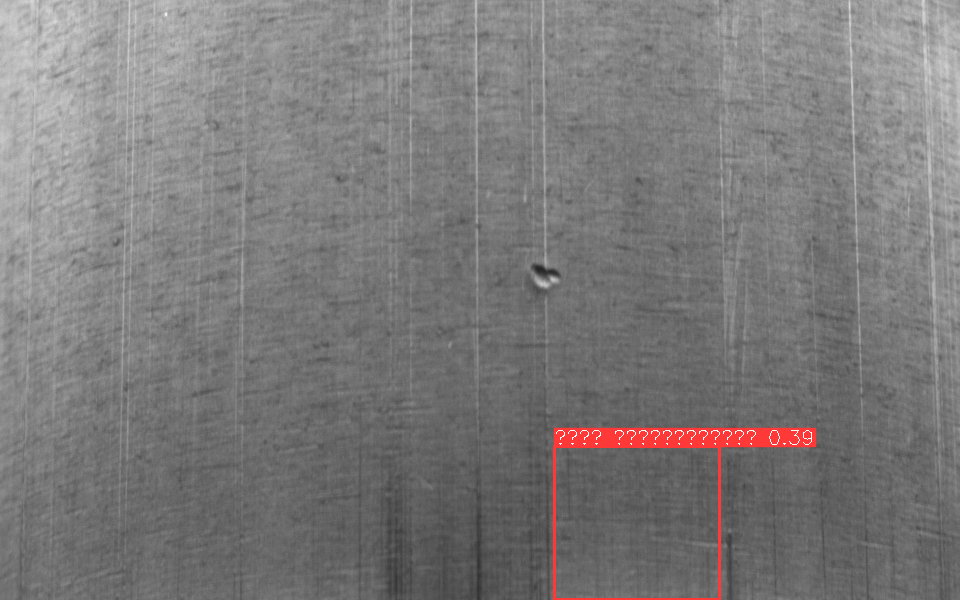

In [12]:
result.export_visuals(export_dir="./")

Image("./prediction_visual.png")

